In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("JV_DMSO_data.csv")

In [16]:
df.head()
df.columns
df.columns = ["Voltage_V", "Current density_mAcm2"]


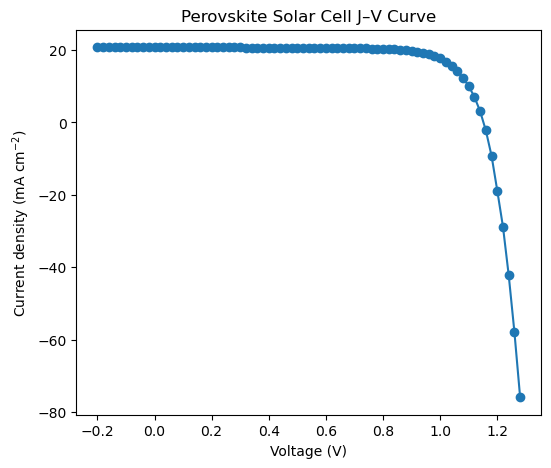

In [20]:
plt.figure(figsize=(6,5))
plt.plot(df["Voltage_V"], df["Current density_mAcm2"], "o-")

plt.xlabel("Voltage (V)")
plt.ylabel("Current density (mA cm$^{-2}$)")
plt.title("Perovskite Solar Cell J–V Curve")
plt.grid(False)
plt.show()

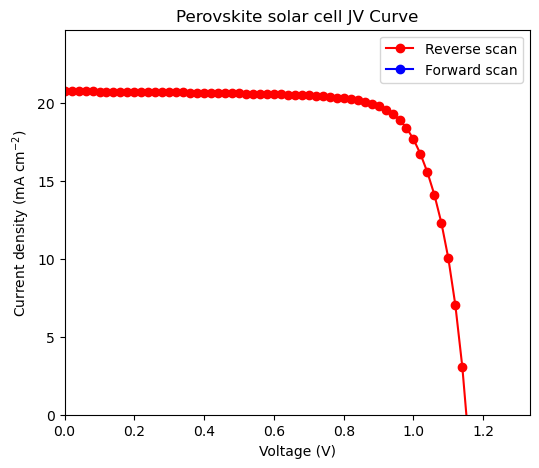

In [24]:
reverse_scan = df[df["Voltage_V"].diff() < 0]
forward_scan = df[df["Voltage_V"].diff() > 0]
plt.figure(figsize=(6,5))

plt.plot(reverse_scan["Voltage_V"], reverse_scan["Current density_mAcm2"],
         "r-o", label="Reverse scan")

plt.plot(forward_scan["Voltage_V"], forward_scan["Current density_mAcm2"],
         "b-o", label="Forward scan")

plt.xlabel("Voltage (V)")
plt.ylabel("Current density (mA cm$^{-2}$)")
plt.title("Perovskite solar cell JV Curve")
plt.legend()
plt.grid(False)
plt.xlim(left=0.0)
plt.ylim(bottom=0.0)
plt.show()

In [26]:
Jsc = np.interp(0, reverse_scan["Voltage_V"], reverse_scan["Current density_mAcm2"])
print("Jsc (mA cm⁻²):", Jsc)

Jsc (mA cm⁻²): 20.76337936


In [27]:
Voc = np.interp(0, reverse_scan["Current density_mAcm2"], reverse_scan["Voltage_V"])
print("Voc (V):", Voc)

Voc (V): 1.1516287829266894


In [28]:
power = reverse_scan["Voltage_V"] * reverse_scan["Current density_mAcm2"]

In [29]:
Pmax = np.max(power)
Vmp = reverse_scan["Voltage_V"].iloc[np.argmax(power)]
Jmp = reverse_scan["Current density_mAcm2"].iloc[np.argmax(power)]

print("Vmp (V):", Vmp)
print("Jmp (mA cm⁻²):", Jmp)
print("Pmax (mW cm⁻²):", Pmax)

Vmp (V): 0.959999979
Jmp (mA cm⁻²): 18.9172765
Pmax (mW cm⁻²): 18.160585042737193


In [30]:
FF = Pmax / (Voc * Jsc)
print("Fill Factor (FF):", FF)

Fill Factor (FF): 0.7594851481114835


In [31]:
Pin = 100  # mW cm^-2
PCE = (Pmax / Pin) * 100

print("PCE (%):", PCE)

PCE (%): 18.160585042737193


In [32]:
results = pd.DataFrame({
    "Voc_V": [Voc],
    "Jsc_mAcm2": [Jsc],
    "FF": [FF],
    "PCE_percent": [PCE]
})

results

,Voc_V,Jsc_mAcm2,FF,PCE_percent
0,1.151629,20.763379,0.759485,18.160585
